In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

import galactic_wavelets as gw

In [24]:
N = 128
quijote_dir = '/mnt/ceph/users/fvillaescusa/Quijote/3D_cubes/'
test_df = quijote_dir+f'fiducial/1/df_m_{N}_CIC_z=0.npy'

device = 0

In [25]:
df = torch.from_numpy(np.load(os.path.join(quijote_dir, test_df))).to(device)
df_shape = df.shape
N = df_shape[0]
print("Shape of the density field: ", df_shape)
print("Min/max/mean of the density field: ", df.min(), df.max(), df.mean())

Shape of the density field:  torch.Size([128, 128, 128])
Min/max/mean of the density field:  tensor(-0.9353, device='cuda:0') tensor(49.5226, device='cuda:0') tensor(-6.6939e-10, device='cuda:0')


In [7]:
J = 5
Q = 1
kc = np.pi

In [26]:
stats_s0, stats_s1 = [], []
for erosion_threshold in np.linspace(0.01, 0.5, 10):
    wst_op_full = gw.ScatteringOp(df_shape, J, Q,
                                kc=kc,
                                erosion_threshold=erosion_threshold,
                                device=device)
    s0, s1 = wst_op_full(df)
    stats_s0.append(s0)
    stats_s1.append(s1)
stats_s0 = torch.stack(stats_s0, axis=0).squeeze()
stats_s1 = torch.stack(stats_s1, axis=0).squeeze()

Computing wavelets...
Done!
Computing masks for the wavelet transform...
Done!
Computing statistics...
Computing S0 coefficients...
Computing S1 coefficients...
Done!
Computing wavelets...
Done!
Computing masks for the wavelet transform...
Done!
Computing statistics...
Computing S0 coefficients...
Computing S1 coefficients...
Done!
Computing wavelets...
Done!
Computing masks for the wavelet transform...
Done!
Computing statistics...
Computing S0 coefficients...
Computing S1 coefficients...
Done!
Computing wavelets...
Done!
Computing masks for the wavelet transform...
Done!
Computing statistics...
Computing S0 coefficients...
Computing S1 coefficients...
Done!
Computing wavelets...
Done!
Computing masks for the wavelet transform...
Done!
Computing statistics...
Computing S0 coefficients...
Computing S1 coefficients...
Done!
Computing wavelets...
Done!
Computing masks for the wavelet transform...
Done!
Computing statistics...
Computing S0 coefficients...
Computing S1 coefficients...
Done

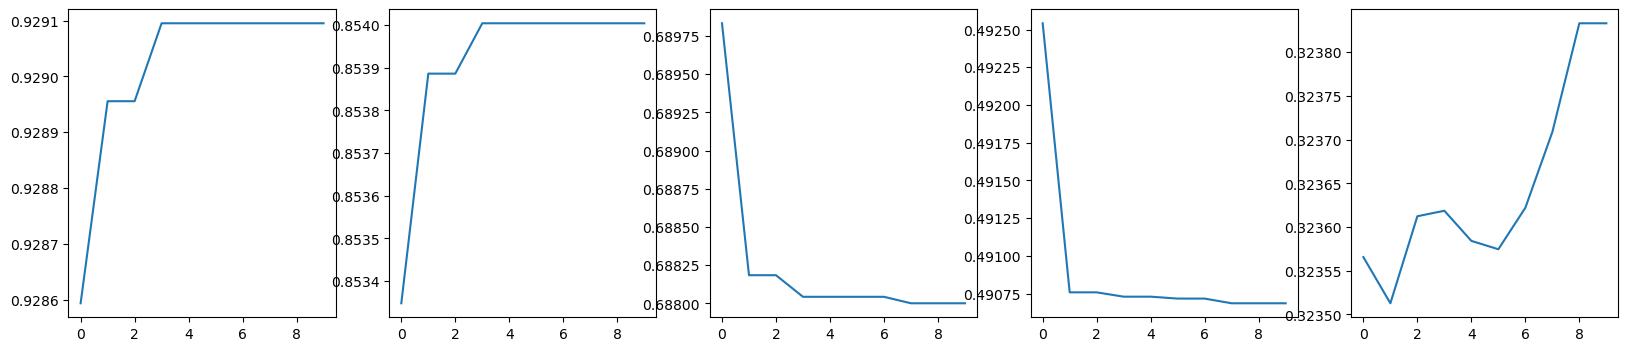

In [23]:
p = 0
fig, axs = plt.subplots(1, J*Q, figsize=(4*J*Q, 4))
for i in range(J):
    axs[i].plot(stats_s1[:, p, i].cpu())

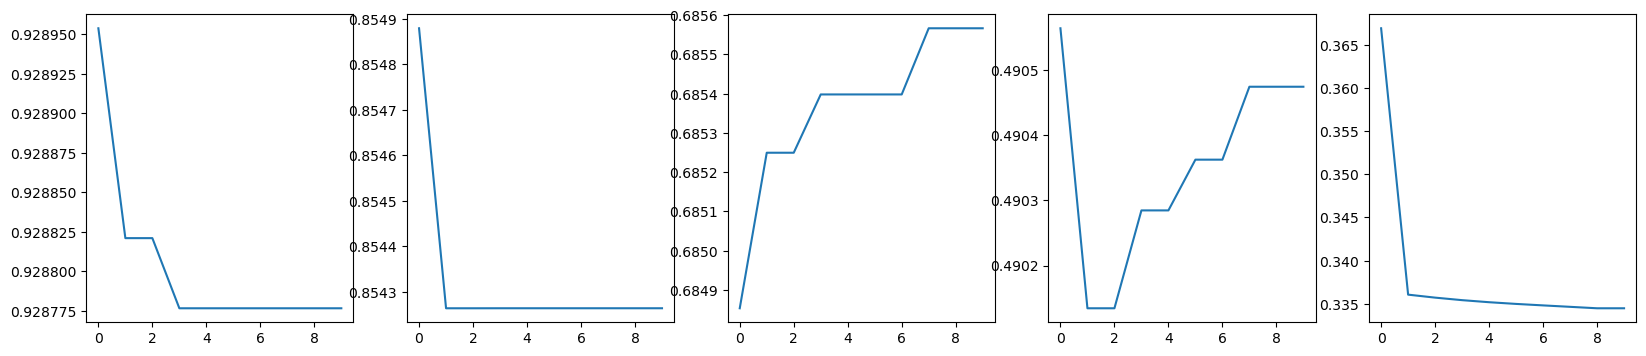

In [27]:
p = 0
fig, axs = plt.subplots(1, J*Q, figsize=(4*J*Q, 4))
for i in range(J):
    axs[i].plot(stats_s1[:, p, i].cpu())